## How to Set Up R Kernel in Jupyter Lab

#### Start R and Install IRkernel in R

install.packages("IRkernel")

#### Run IRkernel in R to make IRkernel available to Jupyter Lab

IRkernel::installspec()

## Install R packages

In [1]:
install.packages("ggplot2")

Installing package into ‘/home/raotoo/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("phyloseq")
BiocManager::install("microbiome")

#### Load R packages

In [1]:
library(phyloseq)
library(ggplot2)
library(microbiome)


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2022 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform




#### Set a working directory

In [2]:
setwd('/Users/srjun/MyCourses/BMIG6202/Lab/picrust2')

**note** that you need to change this line according to your setup.

#### Remove objects in your workspace

In [3]:
rm(list=ls())

#### Set up your theme

In [ ]:
theme_set(theme_bw())

#### Read KO-table and create an otu_table-class object

In [4]:
feat.table <- read.table('chemerin_16S/KO_metagenome_out/pred_metagenome_unstrat.tsv.gz',
                          header=T, row.names=1, sep='\t', quote="", comment.char="",
                          stringsAsFactors=F, check.names=F)
fttable <- otu_table(feat.table, taxa_are_rows=TRUE)

**note** that you need to change this line according to your setup.

#### Read metadata and create a sample_data-class object

In [5]:
meta <- read.table("chemerin_16S/metadata.tsv", header=T, sep='\t', stringsAsFactors=F, check.names=F)
rownames(meta) <- meta[, 1]
meta <- sample_data(meta)

**note** that you need to change this line according to your setup.

#### Create a phyloseq object

In [6]:
ps.obj <- phyloseq(fttable, meta)

#### Centered log-ratio (clr) transformation using transform in microbiome

In [7]:
ps.obj.clr <- transform(ps.obj, "clr")

In [8]:
otu_table(ps.obj.clr)[1:5, 1:6]

,100CHE6KO,101CHE6WT,102CHE6WT,103CHE6KO,104CHE6KO,20CMK6KO
K00001,2.03197733,1.7808662,1.4569545,1.4774388,1.8946152,1.7134040
K00003,0.57497172,2.0677321,1.4690738,1.2430595,1.1449019,1.0826376
K00005,0.02870654,-0.5538601,0.3764473,-1.1880769,-1.9995275,0.8812629
K00008,-0.10810049,-0.5538601,0.3464173,0.6143316,-2.7486489,0.8871043
K00009,-1.69169326,1.3091473,0.3890462,-0.3583586,0.4018376,-0.3298673


#### Perform PCA

In [9]:
ps.obj.clr.ord <- ordinate(ps.obj.clr, "RDA")

In [10]:
head(ps.obj.clr.ord$CA$eig)

PC1        PC2        PC3        PC4        PC5        PC6 
2102.09468  533.60632  365.66762  244.37894  148.05905   80.94266

In [11]:
pcs <- sapply(ps.obj.clr.ord$CA$eig, function(x) x/sum(ps.obj.clr.ord$CA$eig))
pcs <- as.data.frame(pcs)
pcs

,pcs
,<dbl>
PC1,5.712184e-01
PC2,1.450010e-01
PC3,9.936569e-02
PC4,6.640698e-02
PC5,4.023323e-02
PC6,2.199517e-02
PC7,1.960665e-02
PC8,1.415656e-02
PC9,4.995405e-03


#### To determine which dimenstion would be enough

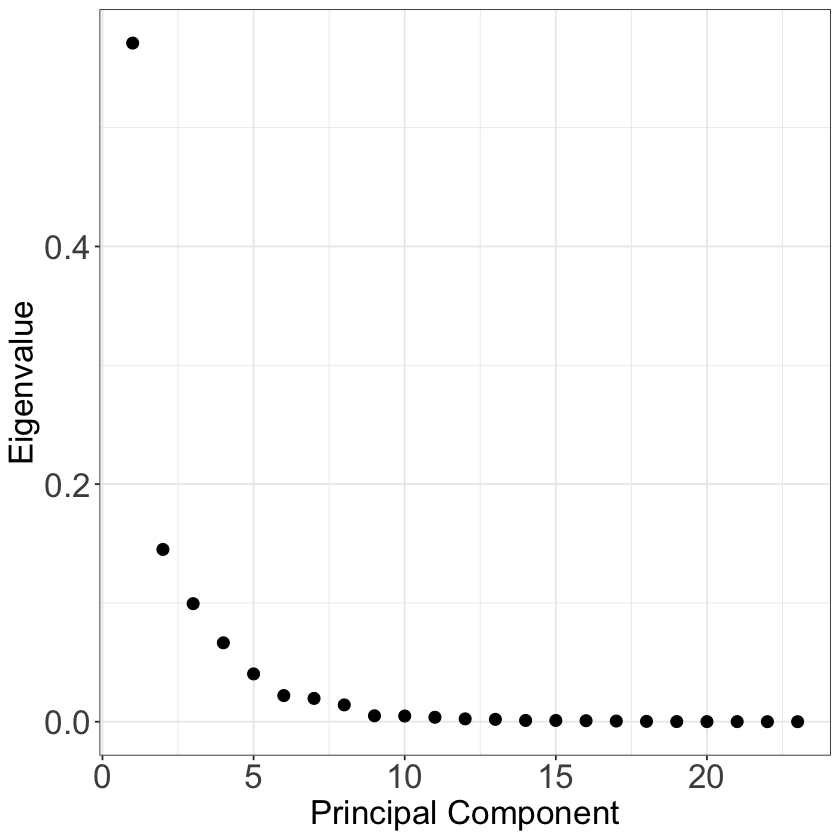

In [12]:
p <- ggplot(pcs, aes(x=seq(1,23), y=pcs)) + 
     geom_point(size=3) +
     xlab("Principal Component") +
     ylab("Eigenvalue") +
     theme(axis.text=element_text(size=20),
           axis.title=element_text(size=20))
p

#### To generate a PCA plot

In [13]:
p <- plot_ordination(ps.obj.clr, ps.obj.clr.ord, axes=1:2, type="samples", color="Genotype") +
     geom_point(size=5) +
     scale_fill_manual(values=c('coral','cornflowerblue')) +
     scale_color_manual(values=c('coral','cornflowerblue')) +
     ggtitle("Principal Component Analysis") +
     theme(plot.title=element_text(size=18,colour="black",hjust=0.5,vjust=0.5),
           panel.grid.major=element_blank(),
           panel.grid.minor=element_blank(),
           panel.background=element_blank(),
           axis.text.x=element_text(colour="black", size=14),
           axis.text.y=element_text(colour="black", size=14),
           axis.title.x=element_text(colour="black",size=18),
           axis.title.y=element_text(colour="black",size=18),
           legend.title=element_text(size=18),
           legend.text=element_text(size=18)
     )

**note** that you need to change this line according to your metadata.

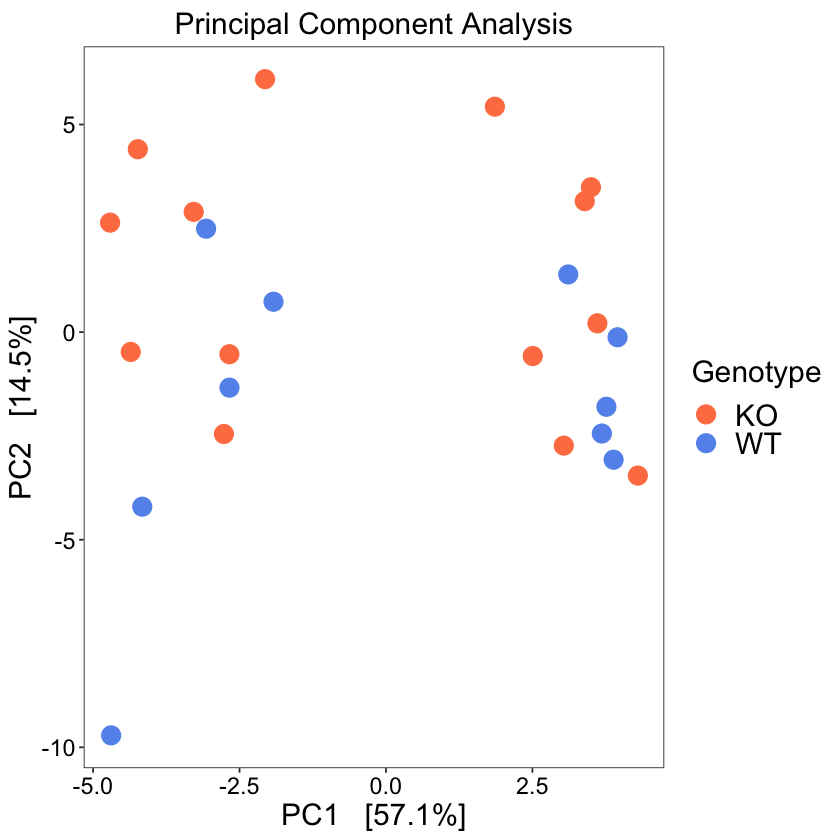

In [24]:
p